「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．


In [1]:
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.font_manager as fm

# 日本語フォントの設定
jp_font_path = '/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc'  # macOSの場合の日本語フォントパス
jp_font = fm.FontProperties(fname=jp_font_path)


In [2]:
def count_cooccurring_words(target_word='猫'):
    cooccur_counter = Counter()

    with open('neko.txt.mecab', 'r', encoding='utf-8') as infile:
        sentence = []
        for line in infile:
            if line == 'EOS\n':
                # 文が終わった時点で共起語を数える
                if any(morph['surface'] == target_word for morph in sentence):
                    for morph in sentence:
                        if morph['surface'] != target_word:
                            cooccur_counter[morph['surface']] += 1
                sentence = []
                continue
            
            # 形態素情報の取得
            surface, attr = line.split('\t')
            attr = attr.split(',')
            morph = {
                'surface': surface,
                'base': attr[6],
                'pos': attr[0],
                'pos1': attr[1]
            }
            sentence.append(morph)

    return cooccur_counter


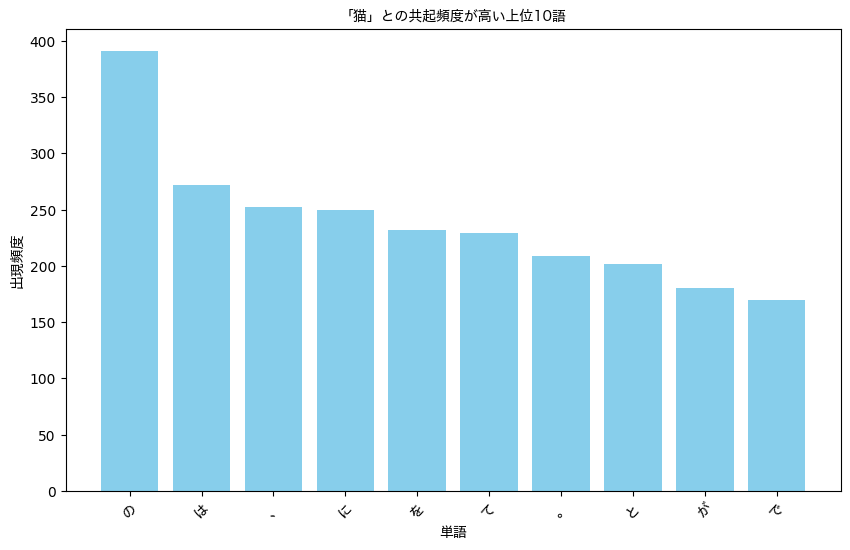

In [3]:
def plot_top_words(word_counter, n=10):
    # 出現頻度の高い順に並べ、上位n語を取得
    top_words = word_counter.most_common(n)
    
    words, freqs = zip(*top_words)  # 単語と頻度を分割

    # 棒グラフを作成
    plt.figure(figsize=(10, 6))
    plt.bar(words, freqs, color='skyblue')
    plt.xlabel('単語', fontproperties=jp_font)
    plt.ylabel('出現頻度', fontproperties=jp_font)
    plt.title(f'「猫」との共起頻度が高い上位{n}語', fontproperties=jp_font)
    plt.xticks(rotation=45, fontproperties=jp_font)
    plt.show()

if __name__ == '__main__':
    cooccur_counter = count_cooccurring_words()
    plot_top_words(cooccur_counter)